In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 51.1 MB/s eta 0:00:00


## 1. 구간에 해당하는 평균 경사도 추출

In [3]:
import geopandas as gpd

In [ ]:
# DEM 데이터
dem = gpd.read_file('/content/gdrive/MyDrive/서울시 경사 벡터화 수정.shp')

In [ ]:
# A, B 포인트를 이용해서 생성한 라인스트링
ep1 = gpd.read_file('/content/gdrive/MyDrive/금천3.shp').iloc[0].geometry

# 라인스트링과 겹치는 DEM 데이터 추출
intersected_dem = dem[dem.intersects(ep1)]

# 추출된 데이터의 DN 평균값 계산
slope = intersected_dem['DN'].mean()
slope

4.1875

## 2. 경사도 5개 구간 설정

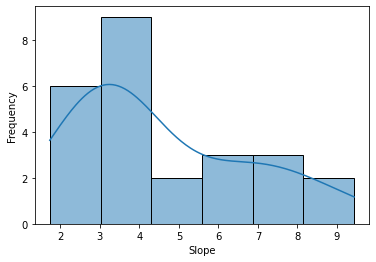

count    25.000000
mean      4.549572
std       2.225265
min       1.735238
25%       3.118751
50%       3.702386
75%       6.246318
max       9.432958
Name: 경사도, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일에서 데이터를 읽어옴
data = pd.read_csv("/content/gdrive/MyDrive/경사불법주차교통사고율.csv")

# '경사도' 컬럼의 값을 추출
slope = data['경사도']

# 히스토그램 그리기
sns.histplot(slope, kde=True)
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.show()

# 기술 통계량 출력
print(slope.describe())

In [ ]:
# 경사도 값을 5개 구간(bin)으로 나눔
bins, bin_edges = pd.qcut(slope, 5, duplicates='drop', labels=False, retbins=True)

# 각 구간별로 자치구 리스트 추출
slope_by_bins = data.groupby(bins).apply(lambda x: x['자치구'].tolist())

# 각 구간에 5개의 자치구가 포함되도록 자치구 수를 맞춤
for i in range(len(slope_by_bins)):
    while len(slope_by_bins[i]) < 5:
        slope_by_bins[i].append(slope_by_bins[i][-1])
    if len(slope_by_bins[i]) > 5:
        slope_by_bins[i] = slope_by_bins[i][:5]
        
# 각 구간의 경계값과 할당된 자치구 출력
for i in range(len(bin_edges)-1):
    print(f"{i+1}번째 구간({bin_edges[i]:.2f}~{bin_edges[i+1]:.2f}): {slope_by_bins[i]}")

1번째 구간(1.74~2.81): ['광진구', '성북구', '강북구', '강동구', '양천구']
2번째 구간(2.81~3.29): ['은평구', '동대문구', '강남구', '중랑구', '강서구']
3번째 구간(3.29~4.16): ['용산구', '관악구', '서초구', '노원구', '금천구']
4번째 구간(4.16~6.66): ['마포구', '종로구', '중구', '송파구', '영등포구']
5번째 구간(6.66~9.43): ['서대문구', '성동구', '동작구', '도봉구', '구로구']


## 3. 불법주정차 단속 비율 5개 구간 설정

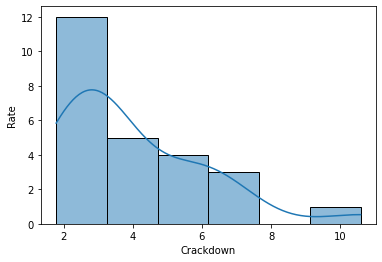

count    25.000000
mean      4.000005
std       2.131252
min       1.783688
25%       2.365583
50%       3.272796
75%       5.522897
max      10.589071
Name: 불법주차 단속 비율('17~'22), dtype: float64


In [ ]:
# '불법주차 단속 비율('17~'22)' 컬럼의 값을 추출
crackdown = data["불법주차 단속 비율('17~'22)"]

# 히스토그램 그리기
sns.histplot(crackdown, kde=True)
plt.xlabel('Crackdown')
plt.ylabel('Rate')
plt.show()

# 기술 통계량 출력
print(crackdown.describe())

In [ ]:
# 단속비율을 5개 구간(bin)으로 나눔
bins = pd.qcut(crackdown, 5, duplicates='drop', labels=False)

# 각 구간별로 자치구 리스트 추출
crackdown_by_bins = data.groupby(bins).apply(lambda x: x['자치구'].tolist())

# 각 구간에 5개의 자치구가 포함되도록 자치구 수를 맞춤
for i in range(len(crackdown_by_bins)):
    while len(crackdown_by_bins[i]) < 5:
        crackdown_by_bins[i].append(crackdown_by_bins[i][-1])
    if len(crackdown_by_bins[i]) > 5:
        crackdown_by_bins[i] = crackdown_by_bins[i][:5]
        
# 각 구간의 경계값과 할당된 자치구 출력
for i in range(len(bin_edges)-1):
    print(f"{i+1}번째 구간({bin_edges[i]:.2f}~{bin_edges[i+1]:.2f}): {crackdown_by_bins[i]}")

1번째 구간(1.74~2.81): ['성북구', '강북구', '도봉구', '중랑구', '금천구']
2번째 구간(2.81~3.29): ['서대문구', '광진구', '동작구', '노원구', '강동구']
3번째 구간(3.29~4.16): ['은평구', '용산구', '동대문구', '성동구', '구로구']
4번째 구간(4.16~6.66): ['마포구', '관악구', '송파구', '양천구', '영등포구']
5번째 구간(6.66~9.43): ['종로구', '중구', '서초구', '강남구', '강서구']


## 4. 자전거 교통사고율 5개 구간 설정

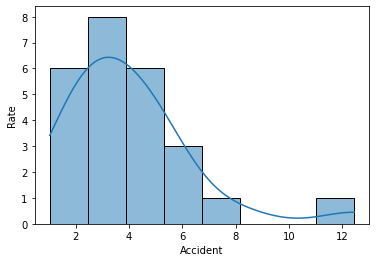

count    25.000000
mean      4.000000
std       2.437324
min       1.032110
25%       2.663099
50%       3.453109
75%       4.943935
max      12.449032
Name: 자전거 교통사고율('17~'21), dtype: float64


In [ ]:
# '자전거 교통사고율('17~'21)' 컬럼의 값을 추출
accident = data["자전거 교통사고율('17~'21)"]

# 히스토그램 그리기
sns.histplot(accident, kde=True)
plt.xlabel('Accident')
plt.ylabel('Rate')
plt.show()

# 기술 통계량 출력
print(accident.describe())

In [ ]:
# 자전거 교통사고율을 5개 구간(bin)으로 나눔
bins = pd.qcut(accident, 5, duplicates='drop', labels=False)

# 각 구간별로 자치구 리스트 추출
accident_by_bins = data.groupby(bins).apply(lambda x: x['자치구'].tolist())

# 각 구간에 5개의 자치구가 포함되도록 자치구 수를 맞춤
for i in range(len(accident_by_bins)):
    while len(accident_by_bins[i]) < 5:
        accident_by_bins[i].append(accident_by_bins[i][-1])
    if len(accident_by_bins[i]) > 5:
        accident_by_bins[i] = accident_by_bins[i][:5]
        
# 각 구간의 경계값과 할당된 자치구 출력
for i in range(len(bin_edges)-1):
    print(f"{i+1}번째 구간({bin_edges[i]:.2f}~{bin_edges[i+1]:.2f}): {accident_by_bins[i]}")

1번째 구간(1.74~2.81): ['서대문구', '종로구', '중구', '관악구', '금천구']
2번째 구간(2.81~3.29): ['은평구', '용산구', '성북구', '서초구', '강북구']
3번째 구간(3.29~4.16): ['마포구', '광진구', '동작구', '도봉구', '구로구']
4번째 구간(4.16~6.66): ['성동구', '강남구', '중랑구', '양천구', '강서구']
5번째 구간(6.66~9.43): ['동대문구', '송파구', '노원구', '강동구', '영등포구']


In [ ]:
/content/gdrive/MyDrive/최종수치.csv

## 5. 자전거 도로의 비율

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


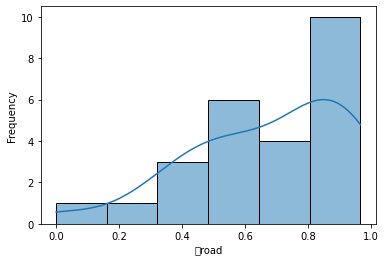

count    25.000000
mean      0.674160
std       0.253726
min       0.000000
25%       0.503000
50%       0.751000
75%       0.892000
max       0.967000
Name: 자전거 도로의 비율, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일에서 데이터를 읽어옴
data = pd.read_csv("/content/gdrive/MyDrive/최종수치.csv")

# '자전거 도로의 비율' 컬럼의 값을 추출
road = data['자전거 도로의 비율']

# 히스토그램 그리기
sns.histplot(road, kde=True)
plt.xlabel('road')
plt.ylabel('Frequency')
plt.show()

# 기술 통계량 출력
print(road.describe())

In [ ]:
# 자전거 도로 비율 값을 5개 구간(bin)으로 나눔
bins, bin_edges = pd.qcut(road, 5, duplicates='drop', labels=False, retbins=True)

# 각 구간별로 자치구 리스트 추출
road_by_bins = data.groupby(bins).apply(lambda x: x['자치구'].tolist())

# 각 구간에 5개의 자치구가 포함되도록 자치구 수를 맞춤
for i in range(len(road_by_bins)):
    while len(road_by_bins[i]) < 5:
        road_by_bins[i].append(road_by_bins[i][-1])
    if len(road_by_bins[i]) > 5:
        road_by_bins[i] = road_by_bins[i][:5]
        
# 각 구간의 경계값과 할당된 자치구 출력
for i in range(len(bin_edges)-1):
    print(f"{i+1}번째 구간({bin_edges[i]:.2f}~{bin_edges[i+1]:.2f}): {road_by_bins[i]}")

1번째 구간(0.00~0.47): ['성북구', '동대문구', '성동구', '동작구', '강북구']
2번째 구간(0.47~0.62): ['광진구', '서초구', '중랑구', '구로구', '영등포구']
3번째 구간(0.62~0.79): ['중구', '관악구', '노원구', '양천구', '강서구']
4번째 구간(0.79~0.90): ['서대문구', '마포구', '송파구', '강동구', '금천구']
5번째 구간(0.90~0.97): ['은평구', '종로구', '용산구', '강남구', '도봉구']


## 6. 자전거 도로의 종류

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


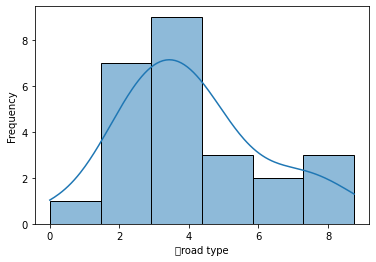

count    25.000000
mean      4.085400
std       2.073904
min       0.000000
25%       2.667000
50%       3.906000
75%       4.998000
max       8.752000
Name: 자전거 도로의 종류, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일에서 데이터를 읽어옴
data = pd.read_csv("/content/gdrive/MyDrive/최종수치.csv")

# '자전거 도로의 비율' 컬럼의 값을 추출
road = data['자전거 도로의 종류']

# 히스토그램 그리기
sns.histplot(road, kde=True)
plt.xlabel('road type')
plt.ylabel('Frequency')
plt.show()

# 기술 통계량 출력
print(road.describe())

In [ ]:
# 자전거 도로 비율 값을 5개 구간(bin)으로 나눔
bins, bin_edges = pd.qcut(road, 5, duplicates='raise', labels=False, retbins=True)

# 각 구간별로 자치구 리스트 추출
road_by_bins = data.groupby(bins).apply(lambda x: x['자치구'].tolist())

# 각 구간에 5개의 자치구가 포함되도록 자치구 수를 맞춤
for i in range(len(road_by_bins)):
    while len(road_by_bins[i]) < 5:
        road_by_bins[i].append(road_by_bins[i][-1])
    if len(road_by_bins[i]) > 5:
        road_by_bins[i] = road_by_bins[i][:5]
        
# 각 구간의 경계값과 할당된 자치구 출력
for i in range(len(bin_edges)-1):
    print(f"{i+1}번째 구간({bin_edges[i]:.2f}~{bin_edges[i+1]:.2f}): {road_by_bins[i]}")

1번째 구간(0.00~2.41): ['동작구', '서초구', '강북구', '중랑구', '영등포구']
2번째 구간(2.41~3.40): ['마포구', '성북구', '동대문구', '관악구', '구로구']
3번째 구간(3.40~4.00): ['서대문구', '성동구', '강남구', '송파구', '도봉구']
4번째 구간(4.00~5.46): ['용산구', '광진구', '노원구', '양천구', '양천구']
5번째 구간(5.46~8.75): ['은평구', '종로구', '중구', '강서구', '금천구']


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


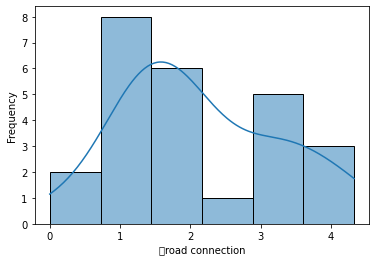

count    25.000000
mean      2.133160
std       1.126274
min       0.000000
25%       1.333000
50%       2.000000
75%       3.000000
max       4.333000
Name: 자전거 도로의 연결성, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일에서 데이터를 읽어옴
data = pd.read_csv("/content/gdrive/MyDrive/최종수치.csv")

# '자전거 도로의 비율' 컬럼의 값을 추출
road = data['자전거 도로의 연결성']

# 히스토그램 그리기
sns.histplot(road, kde=True)
plt.xlabel('road connection')
plt.ylabel('Frequency')
plt.show()

# 기술 통계량 출력
print(road.describe())